# Упражнение 11.3

Для примера "соло на барабане", применим фильтр низких частот до выборки, затем, также с помощью фильтра низких частот, удалим спектральные копии, вызванные выборкой, и посмотрим на результат  

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-06-13 19:25:16--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-06-13 19:25:16--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0s      

2024-06-13 19:25:16 (97.8 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Загрузим исследуемый отрывок:

In [3]:
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav

--2024-06-13 19:25:23--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav [following]
--2024-06-13 19:25:23--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058544 (1.0M) [audio/wav]
Saving to: ‘263868__kevcio__amen-break-a-160-bpm.wav’

263868__kevcio__ame 100%[===================>]   1.01M  --.-KB/s    in 0.008s  

20

Распечатаем:

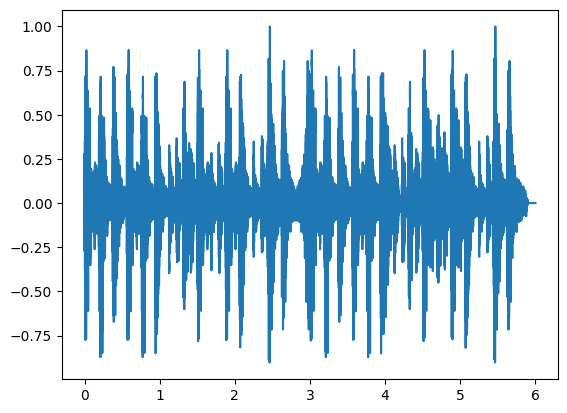

In [4]:
from thinkdsp import read_wave

wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

Послушаем:

In [5]:
wave.make_audio()

Распечатаем спектр:

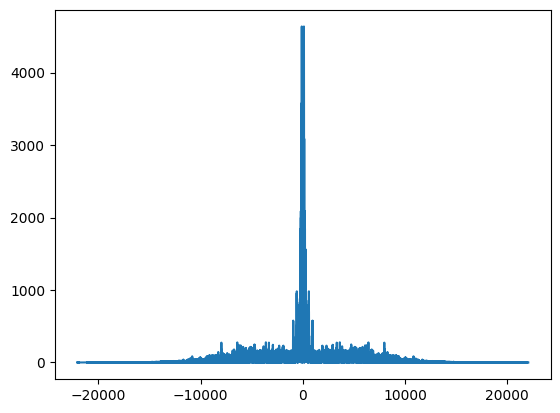

In [6]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Уменьшим частоту дискретизации в 10 раз:

In [7]:
factor = 10
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

Перед выборкой мы применяем фильтр для удаления частот выше новой максимальной частоты сигнала, которая находится в середине кадра:

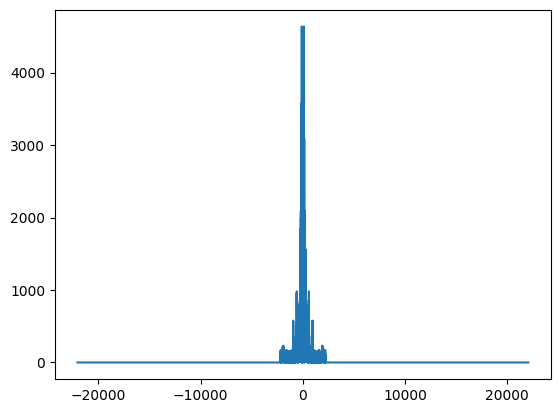

In [8]:
spectrum.low_pass(cutoff)
spectrum.plot()

Послушаем сигнал после фильтрации:

In [9]:
filtered = spectrum.make_wave()
filtered.make_audio()

Высокие частоты практически не слышны

Далее напишем функцию, которая имитирует процесс выборки


In [10]:
from thinkdsp import Wave

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate)

Послушаем:

In [11]:
sampled = sample(filtered, factor)
sampled.make_audio()

Распечатаем спектр:

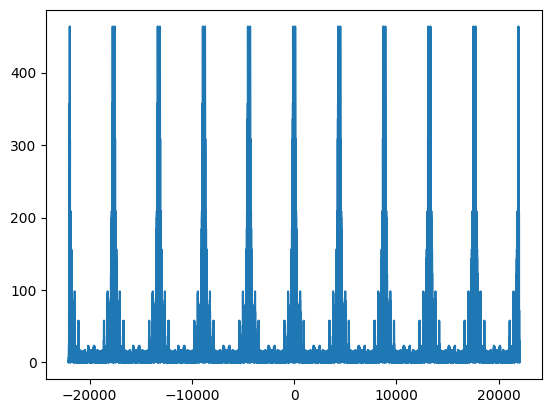

In [12]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Видим, что на спектре множество спектральных копий. Удалим их при помощи фильтра низких частот и посмотрим, насколько результат отличается от отфильтрованного сигнала



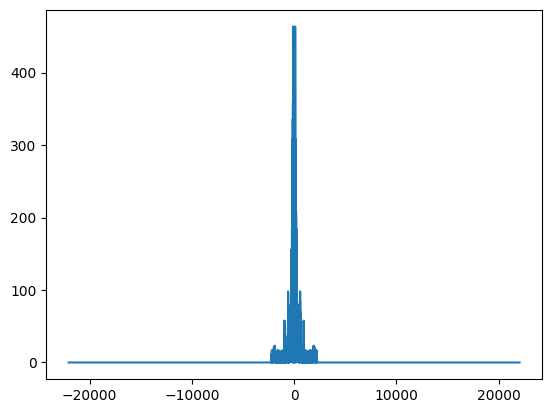

In [13]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

Восстановим энергию спектра:

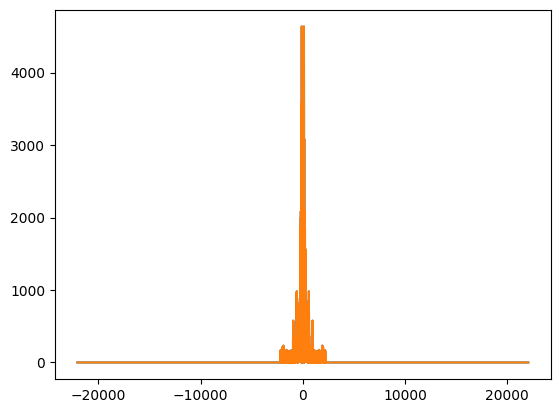

In [14]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Подсчитаем разницу между спектром до и после выборки:

In [15]:
spectrum.max_diff(sampled_spectrum)

1.8189894035458565e-12

Видим, что погрешность крайне мала